## Beside the Point
November 2024 : Puzzle

Two random points, one red and one blue, are chosen uniformly and independently from the interior of a square. To ten decimal places1, what is the probability that there exists a point on the side of the square closest to the blue point that is equidistant to both the blue point and the red point?

(Or, if you want to send in the exact answer, that’s fine too!) ↩

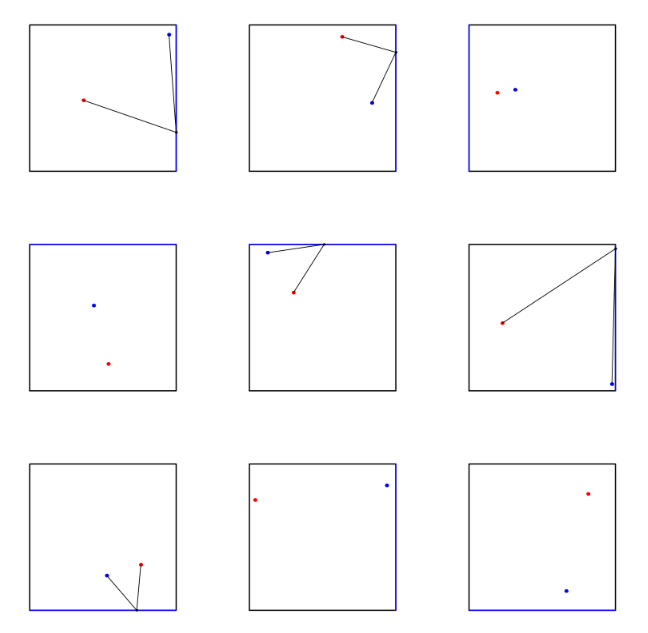

In [ ]:
# Monte carlo solution, takes a long time to run

import numpy as np
from tqdm import tqdm
from numba import jit

@jit(nopython=True, fastmath=True)
def test():
    r = np.random.rand(2)
    b = np.random.rand(2)
    d1 = b[0]
    d2 = 1 - b[0]
    d3 = b[1]
    d4 = 1 - b[1]

    distances = [d1, d2, d3, d4]
    min_distance = min(distances)
    min_distance_i = distances.index(min_distance)

    if min_distance_i == 0:
        r[0] = 1 - r[0]
        b[0] = 1 - b[0]
    elif min_distance_i == 2:
        new_r = np.array([1 - r[1], r[0]])
        new_b = np.array([1 - b[1], b[0]])
        r = new_r
        b = new_b
    elif min_distance_i == 3:
        new_r = np.array([r[1], r[0]])
        new_b = np.array([b[1], b[0]])
        r = new_r
        b = new_b

    beta = (b[0]**2 - 2*b[0] + b[1]**2 - r[0]**2 + 2*r[0] - r[1]**2) / (2*(b[1] - r[1]))

    if beta <= 1 and beta >= 0:
        return 1
    else:
        return 0


iterations = 960015000000000
num_true = 0

for i in tqdm(range(iterations)):
    num_true += test()
    if i % 100000000 == 0:
        print(num_true / (i + 1))
        print(i)

print(num_true / iterations)

In [ ]:
# General solution

import math
import scipy.integrate as integrate


def big_func(b, a):

    def func_1(x):
        return math.sqrt(a**2 + b**2 - x**2)

    def func_2(x):
        return math.sqrt((a - 1) ** 2 + b**2 - (x - 1) ** 2)

    func_1_0 = math.sqrt(a**2 + b**2)
    func_2_0 = 1 - math.sqrt(1 + (a**2 - 2 * a + b**2))

    a1 = integrate.quad(func_1, 0, a, limit=1000000000, epsabs=1e-20)[0]
    a2 = integrate.quad(func_2, a, 1, limit=1000000000, epsabs=1e-20)[0]
    a3 = integrate.quad(func_1, a, func_1_0, limit=1000000000, epsabs=1e-20)[0]
    a4 = integrate.quad(func_2, func_2_0, a, limit=1000000000, epsabs=1e-20)[0]

    A = a1 + a2 - a3 - a4

    return A


res = integrate.dblquad(
    big_func, 0, 1, lambda x: 0, lambda x: -abs(x - 0.5) + 0.5, epsabs=1e-20
)[0]


print(res * 4)